In [1]:
import pandas as pd
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from keras.layers import *
from keras import *
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [548]:
df = web.DataReader("^GDAXI", data_source="yahoo", start="1990-01-01", end="2020-05-17")

In [549]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,1788.890015,1788.890015,1788.890015,1788.890015,0.0,1788.890015
1990-01-03,1867.290039,1867.290039,1867.290039,1867.290039,0.0,1867.290039
1990-01-04,1830.920044,1830.920044,1830.920044,1830.920044,0.0,1830.920044
1990-01-05,1812.900024,1812.900024,1812.900024,1812.900024,0.0,1812.900024
1990-01-08,1841.469971,1841.469971,1841.469971,1841.469971,0.0,1841.469971


In [550]:
df.shape

(7673, 6)

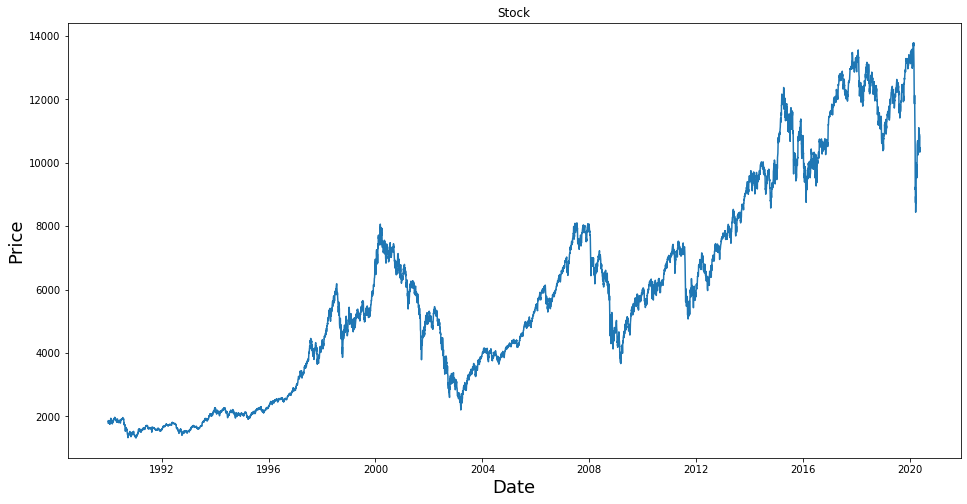

In [551]:
plt.figure(figsize=(16,8))
plt.title("Stock")
plt.xlabel("Date", fontsize=(18))
plt.ylabel("Price", fontsize=18)
plt.plot(df["Close"])
plt.show()

In [552]:
#data = df.filter(["Close"])
data = df.filter(["Close"])
days = df.filter(["Date"])
dataset = data.values
print(dataset)
train_length = math.ceil(len(dataset) * 0.8)
train_length

[[ 1788.89001465]
 [ 1867.29003906]
 [ 1830.92004395]
 ...
 [10542.66015625]
 [10337.01953125]
 [10465.16992188]]


6139

In [553]:
train_data = dataset[0:train_length,:]
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)

In [554]:
x_train=[]
y_train=[]
for x in range(60,train_length):
    x_train.append(train_data[x-60:x ,:])
    y_train.append(train_data[x,:])


In [555]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [556]:
x_train.reshape(x_train.shape[0], x_train.shape[1],1)

array([[[0.05598525],
        [0.06529002],
        [0.06097351],
        ...,
        [0.07294034],
        [0.07174045],
        [0.07329995]],

       [[0.06529002],
        [0.06097351],
        [0.05883484],
        ...,
        [0.07174045],
        [0.07329995],
        [0.0723671 ]],

       [[0.06097351],
        [0.05883484],
        [0.06222561],
        ...,
        [0.07329995],
        [0.0723671 ],
        [0.07134405]],

       ...,

       [[1.        ],
        [0.99678848],
        [0.99847613],
        ...,
        [0.97007166],
        [0.97191832],
        [0.96576939]],

       [[0.99678848],
        [0.99847613],
        [0.99728813],
        ...,
        [0.97191832],
        [0.96576939],
        [0.94924275]],

       [[0.99847613],
        [0.99728813],
        [0.98671698],
        ...,
        [0.96576939],
        [0.94924275],
        [0.95207689]]])

In [557]:
model = Sequential()
model.add(LSTM(units= 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
6079/6079 [==============================] - 456s 75ms/step - loss: 0.0030 - accuracy: 3.2900e-04
Epoch 2/3
6079/6079 [==============================] - 452s 74ms/step - loss: 0.0016 - accuracy: 3.2900e-04
Epoch 3/3
6079/6079 [==============================] - 451s 74ms/step - loss: 0.0014 - accuracy: 3.2900e-04


In [558]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [559]:
test_data = dataset[train_length-60:,:]
scaled_test_data = scaler.fit_transform(test_data)
x_test = []
y_test = scaled_test_data[train_length:,:]
for x in range(60,len(test_data)):
    x_test.append(scaled_test_data[x-60:x,:])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_train.shape[2]))
x_test.shape

(1534, 60, 1)

In [560]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[ 9352.001],
       [ 9313.807],
       [ 9324.292],
       ...,
       [10844.57 ],
       [10785.808],
       [10651.577]], dtype=float32)

In [561]:
training_data=data[:train_length]
valid = data[train_length:]
valid["Predictions"]=predict[:,:]
valid

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
Date,,
2014-04-16,9317.820312,9352.000977
2014-04-17,9409.709961,9313.806641
2014-04-22,9600.089844,9324.291992
2014-04-23,9544.190430,9397.528320
2014-04-24,9548.679688,9472.876953
...,...,...
2020-05-11,10824.990234,10771.510742
2020-05-12,10819.500000,10818.638672
2020-05-13,10542.660156,10844.570312


(6139, 1)


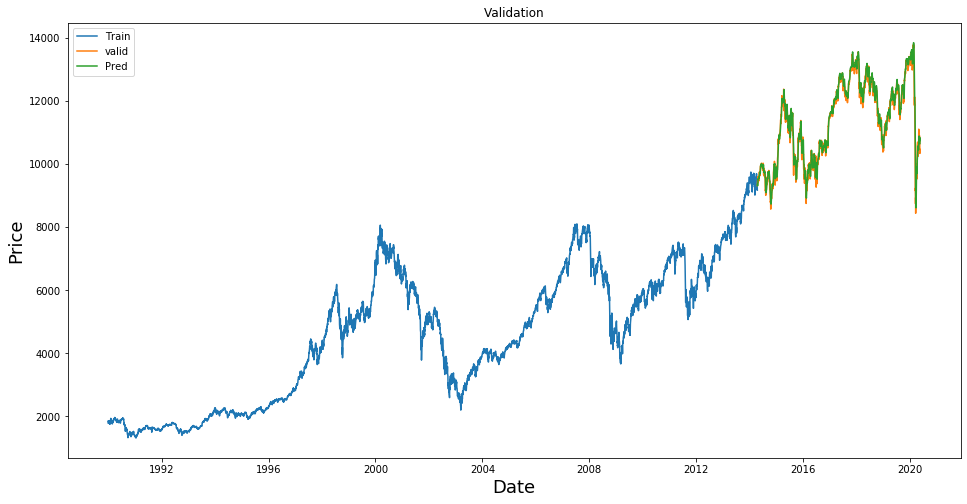

In [562]:
plt.figure(figsize=(16,8))
plt.title("Validation")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
print(train_data.shape)
plt.plot(training_data)
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "valid", "Pred"])
plt.show()

In [593]:
def future(days,training_data, dataset, scaler, valid, start_day):
    rng = pd.date_range('2020-05-18', periods=600, freq='D')
    results = []
    dates = day_array
    test_data = dataset[len(dataset)-61:,:]
    scaled_test_data = scaler.fit_transform(test_data)
    if len(test_data):
        y_test = scaler.fit_transform(test_data)
    for day in range(days):
        x_test = []
        for x in range(60,len(scaled_test_data)):
            x_test = scaled_test_data[x-60:x,:]
        x_test = np.array(x_test)
        x_test = np.reshape(x_test, (1, x_test.shape[0], x_test.shape[1]))
        predict = model.predict(x_test)
        scaled_test_data = np.append(scaled_test_data,predict)
        scaled_test_data = np.reshape(scaled_test_data, (scaled_test_data.shape[0],1))
        helper = scaler.inverse_transform(predict)[0][0]
        results.append(helper)
    dates = dates[:len(results)]
    df = pd.DataFrame({ 'Date': rng, 'Predictions' : results})
    print(df)
    dates["Predictions"] = results
    print(valid["Predictions"])
    plot(training_data, valid["Close"], dates["Predictions"])

In [594]:
def plot(training_data, test, predictions):
    plt.figure(figsize=(16,8))
    plt.title("Validation")
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.plot(training_data)
    plt.plot(test)
    plt.plot(predictions)
    plt.legend(["Train", "valid", "Pred"])
    print(test)
    print(predictions)
    plt.show()

In [595]:
future(600,training_data,dataset, scaler, [], days[-1].index)

          Date   Predictions
0   2020-05-18  10651.577148
1   2020-05-19  10547.583984
2   2020-05-20  10533.271484
3   2020-05-21  10540.094727
4   2020-05-22  10544.505859
..         ...           ...
595 2022-01-03  15079.541992
596 2022-01-04  15079.543945
597 2022-01-05  15079.543945
598 2022-01-06  15079.543945
599 2022-01-07  15079.543945

[600 rows x 2 columns]


C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TypeError: list indices must be integers or slices, not str

In [513]:
test_data = dataset[0:11,:]
print(len(test_data))
x_test = []
y_test =[]
for x in range(9,len(test_data)):
    x_test.append(test_data[x-9:x,:])
    y_test.append(test_data[x,:])
print(x_test)
print(y_test)

11
[array([[71.        ],
       [69.5       ],
       [67.        ],
       [61.        ],
       [64.73999786],
       [66.26000214],
       [66.        ],
       [68.        ],
       [68.        ]]), array([[69.5       ],
       [67.        ],
       [61.        ],
       [64.73999786],
       [66.26000214],
       [66.        ],
       [68.        ],
       [68.        ],
       [71.30000305]])]
[array([71.30000305]), array([73.26000214])]


In [586]:
days[train_length:]
test = days[-2:-1]
test

""
Date
2020-05-14


In [587]:
rng = pd.date_range('2020-05-17', periods=200, freq='D')

DatetimeIndex(['2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02'],
              dtype='datetime64[ns]', length=200, freq='D')

In [630]:
days[-1:].index
days[-1:].loc['2020-05-15'].name


TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [-1] of <class 'int'>